In [1]:
%reload_ext autoreload
%autoreload 2

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from src.bin.data.clean_data import clean_data, transform_data
from src.data.load_data import load_raw_reddit_data, load_interim_reddit_data, load_reddit_performance_data

In [2]:
X_train, X_test = load_reddit_performance_data()

In [3]:
X_train.columns

Index(['height_cm', 'weight_kg', 'arm_span_cm', 'climbing_exp_years',
       'hangboard_freq_weekly', 'hangboard_max_weight_half_crimp_kg',
       'hangboard_max_weight_open_crimp_kg',
       'hangboard_min_edge_half_crimp_mm', 'hangboard_min_edge_open_crimp_mm',
       'max_weight_pull_ups_kg', 'bmi', 'ape_index', 'is_male'],
      dtype='object')

In [4]:
data = load_interim_reddit_data()

In [5]:
from pathlib import Path
import joblib
from src.data.load_data import PROJECT_ROOT

model_path = PROJECT_ROOT / "data/models/performance_model" / "model.pkl"

model = joblib.load(model_path)

In [6]:
model.predict(X_test)

array([4.66292946, 6.36877177, 4.51445717, 7.35493647, 5.95175019,
       5.70339242, 8.25903384, 5.81973716, 6.71387508, 6.62348702,
       5.58045008, 7.64653007, 6.11640707, 7.83877344, 8.3899274 ,
       7.80853731, 4.50484992, 4.92472235, 6.64850433, 6.93634157,
       4.39725143, 6.95405572, 8.67142659, 6.17135562, 6.29996952,
       7.38747251, 6.24631904, 6.50736083, 4.72869291, 6.37814009,
       5.74342326, 6.44635664, 5.90345813, 7.09778639, 5.6386978 ,
       6.17700903, 6.02857062, 8.85310709, 6.26974014, 7.33037096,
       6.19618677, 5.33125585, 6.76694108, 6.86106868, 8.63321364,
       6.64926262, 5.70160188, 9.20225415, 6.4397899 , 6.32113465,
       6.21238129, 5.53058691, 8.0122141 , 8.58996019, 5.31810517,
       4.45766442, 6.09311144, 4.17017981, 5.74729337, 8.68162253,
       6.10696148])

In [7]:
model.predict(X_test.values)

/Users/aleksanderskorupa/miniconda3/envs/climb_harder/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNNImputer was fitted with feature names
  warnings.warn(


array([4.66292946, 6.36877177, 4.51445717, 7.35493647, 5.95175019,
       5.70339242, 8.25903384, 5.81973716, 6.71387508, 6.62348702,
       5.58045008, 7.64653007, 6.11640707, 7.83877344, 8.3899274 ,
       7.80853731, 4.50484992, 4.92472235, 6.64850433, 6.93634157,
       4.39725143, 6.95405572, 8.67142659, 6.17135562, 6.29996952,
       7.38747251, 6.24631904, 6.50736083, 4.72869291, 6.37814009,
       5.74342326, 6.44635664, 5.90345813, 7.09778639, 5.6386978 ,
       6.17700903, 6.02857062, 8.85310709, 6.26974014, 7.33037096,
       6.19618677, 5.33125585, 6.76694108, 6.86106868, 8.63321364,
       6.64926262, 5.70160188, 9.20225415, 6.4397899 , 6.32113465,
       6.21238129, 5.53058691, 8.0122141 , 8.58996019, 5.31810517,
       4.45766442, 6.09311144, 4.17017981, 5.74729337, 8.68162253,
       6.10696148])

# Explore

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 96 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   timestamp                               624 non-null    object 
 1   gender                                  624 non-null    object 
 2   height_cm                               622 non-null    float64
 3   weight_kg                               624 non-null    float64
 4   arm_span_cm                             597 non-null    float64
 5   climbing_exp_years                      624 non-null    float64
 6   climbing_activities                     624 non-null    object 
 7   max_climbed_grade_v                     624 non-null    object 
 8   recent_max_climbed_grade_v              624 non-null    object 
 9   consistent_grade_v                      624 non-null    object 
 10  max_route_grade_ewbank                  624 non-null    object

In [9]:
data.select_dtypes('float').columns

Index(['height_cm', 'weight_kg', 'arm_span_cm', 'climbing_exp_years',
       'hangboard_max_weight_half_crimp_kg',
       'hangboard_max_weight_open_crimp_kg',
       'hangboard_min_edge_half_crimp_mm', 'hangboard_min_edge_open_crimp_mm',
       'max_pull_ups', 'max_weight_pull_ups_kg', 'max_push_ups',
       'max_l_sit_sec', 'weight_lbs', 'bmi', 'ape_index', 'ape_diff',
       'max_climbed_grade', 'recent_max_climbed_grade', 'consistent_grade',
       'inferred_max_grade', 'inferred_recent_grade',
       'inferred_consistent_grade'],
      dtype='object')

In [10]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
height_cm,622.0,176.916608,8.430834,150.000000,172.000000,178.000000,183.000000,201.100000
weight_kg,624.0,70.044680,10.333114,38.400000,63.000000,70.000000,77.000000,117.000000
arm_span_cm,597.0,178.726680,11.127268,110.000000,173.000000,180.000000,185.000000,210.000000
climbing_exp_years,624.0,4.332532,4.200149,0.250000,1.250000,2.750000,6.250000,15.000000
climbing_freq_weekly,624.0,3.000000,1.094272,0.000000,2.000000,3.000000,4.000000,7.000000
avg_climbing_hours_weekly,624.0,6.679487,3.416018,0.000000,4.000000,6.000000,9.000000,24.000000
avg_training_hours_weekly,624.0,2.899038,2.833145,0.000000,1.000000,2.000000,4.000000,15.000000
hangboard_freq_weekly,624.0,0.940705,1.120942,0.000000,0.000000,1.000000,2.000000,7.000000
hangboard_max_weight_half_crimp_kg,224.0,27.345156,23.408241,-18.000000,10.000000,25.000000,39.250000,150.000000
hangboard_max_weight_open_crimp_kg,184.0,26.627462,23.814740,-20.000000,8.750000,23.000000,40.200000,123.000000


In [11]:
data.max_climbed_grade_fb	

0       7B
1       6A
2      7A+
3       6C
4      7C+
      ... 
619     7B
620    7A+
621    7A+
622    7C+
623    7A+
Name: max_climbed_grade_fb, Length: 624, dtype: object

<Axes: >

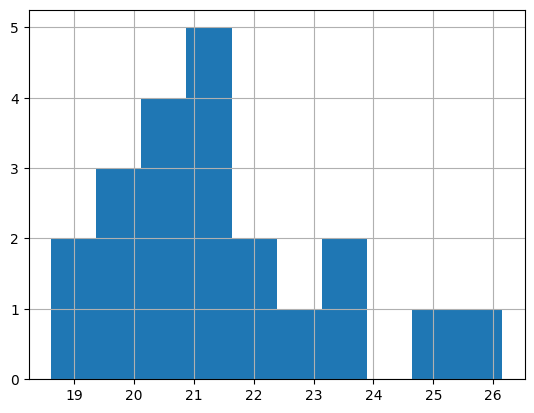

In [12]:
data.query('recent_max_climbed_grade > 10').select_dtypes('float')['bmi'].hist()

In [13]:
pd.set_option("display.precision", 2)
data.query('recent_max_climbed_grade > 10').select_dtypes('float').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
height_cm,21.0,176.90,5.48,165.00,173.00,177.00,180.00,189.00
weight_kg,21.0,67.04,7.43,55.00,63.00,66.00,71.00,83.00
arm_span_cm,21.0,181.62,7.55,165.00,178.00,182.00,185.00,196.00
climbing_exp_years,21.0,8.29,3.79,1.75,6.25,8.25,10.25,15.00
hangboard_max_weight_half_crimp_kg,16.0,55.06,36.13,10.00,35.75,50.00,60.00,150.00
hangboard_max_weight_open_crimp_kg,10.0,56.10,25.08,10.00,42.50,55.00,69.00,100.00
hangboard_min_edge_half_crimp_mm,11.0,7.18,2.32,4.00,6.00,6.00,8.00,12.00
hangboard_min_edge_open_crimp_mm,7.0,7.14,2.19,5.00,5.50,6.00,9.00,10.00
max_pull_ups,16.0,28.62,15.21,10.00,24.50,25.00,30.00,80.00
max_weight_pull_ups_kg,15.0,45.18,25.95,5.00,30.88,40.00,50.00,110.00


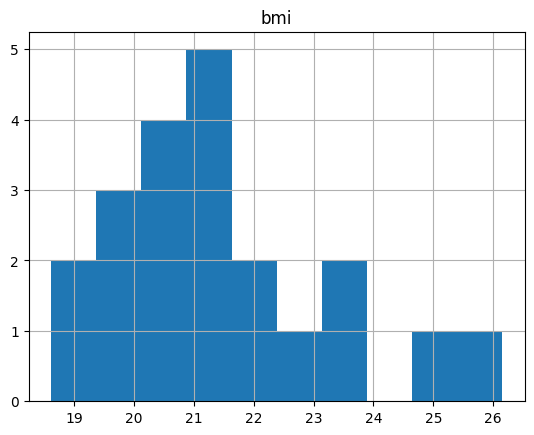

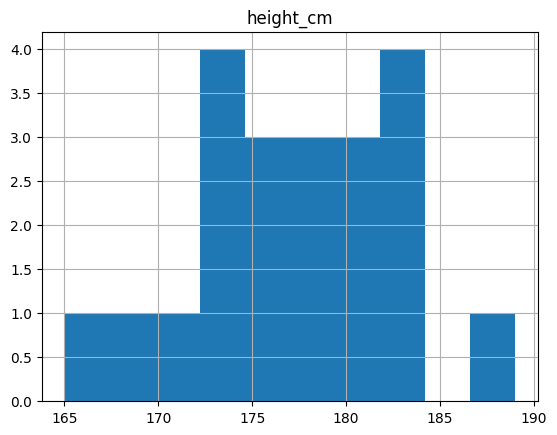

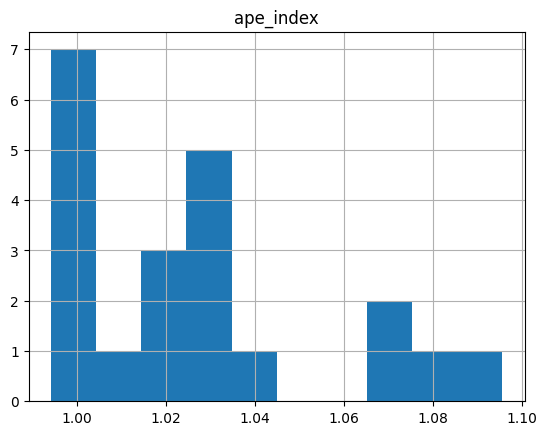

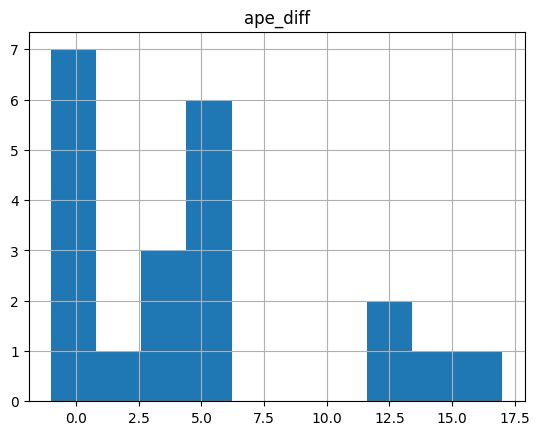

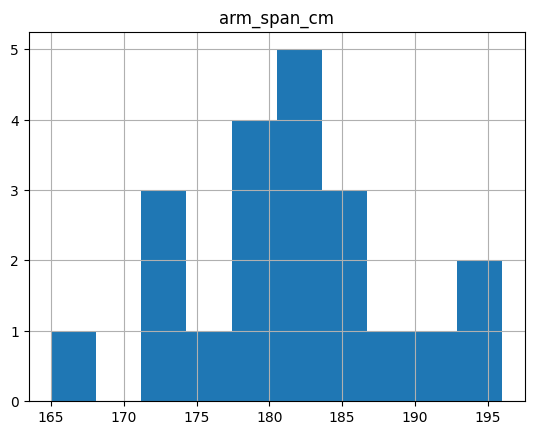

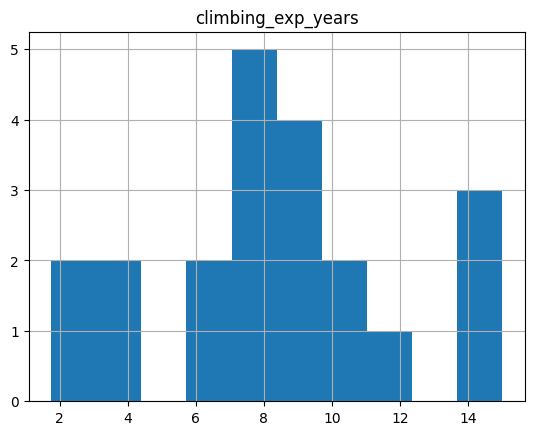

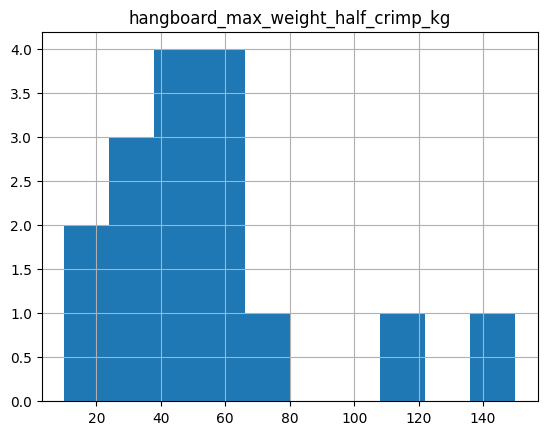

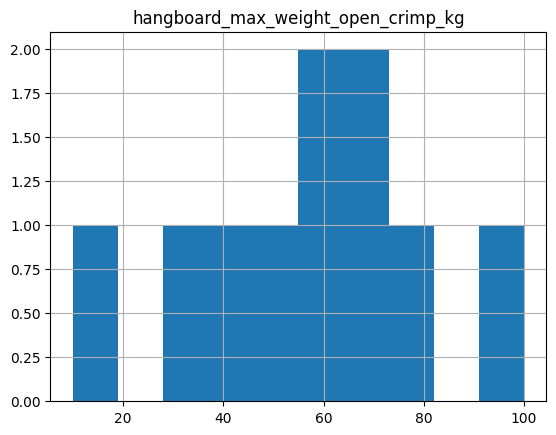

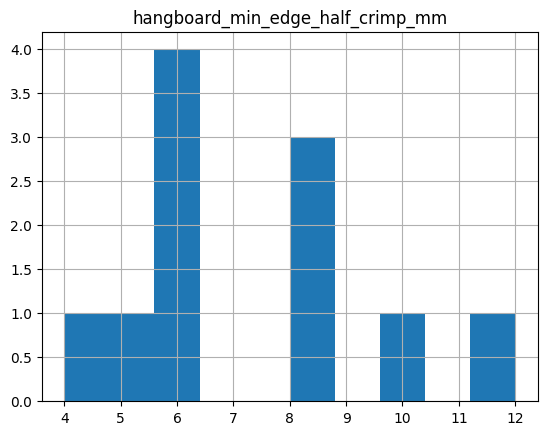

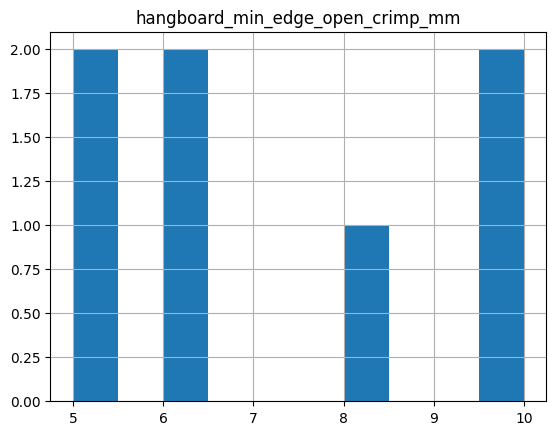

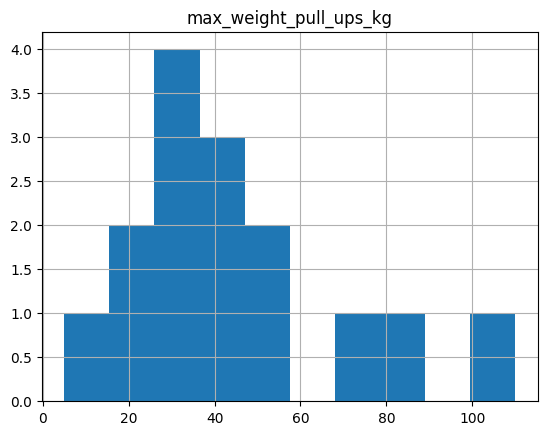

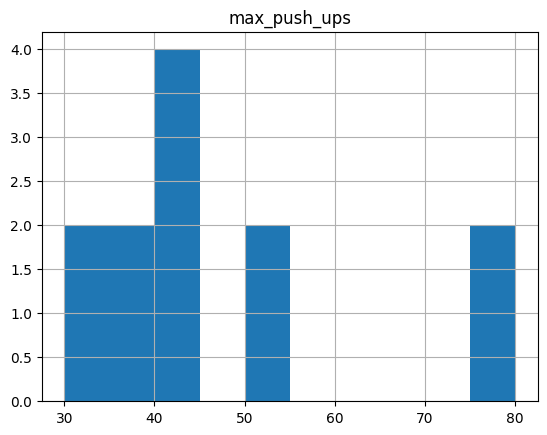

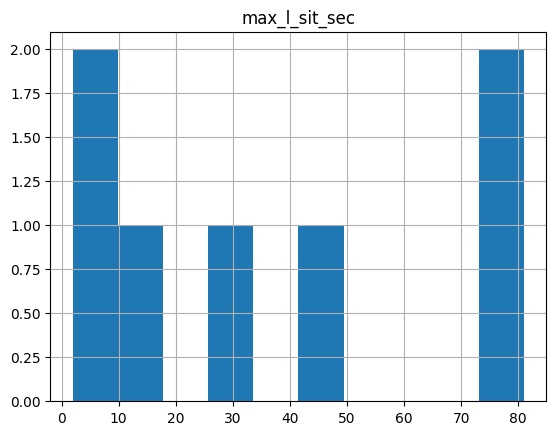

In [14]:
for col in [
        "bmi",
        "height_cm",
        "ape_index",
        "ape_diff",
        "arm_span_cm",
        "climbing_exp_years",
        "hangboard_max_weight_half_crimp_kg",
        "hangboard_max_weight_open_crimp_kg",
        "hangboard_min_edge_half_crimp_mm",
        "hangboard_min_edge_open_crimp_mm",
        "max_weight_pull_ups_kg",
        "max_push_ups",
        "max_l_sit_sec",
    ]:
    data.query('recent_max_climbed_grade > 10')[col].hist()
    plt.title(col)
    plt.show()